In [17]:
import gurobi_manager

gurobi_manager.options = {
    'WLSACCESSID': '023dd6c9-cfb8-4f1b-a33c-77f3682d6631',
    'WLSSECRET': 'd7d09c3c-39c0-42dd-9f4d-4fae36615968',
    'LICENSEID': 2589125
}

In [30]:
import networkx as nx
from torch import tensor

from graph import create_graph

n = 15
# incidence_matriz = tensor([[3, 4, 4, 6, 7, 9, 0, 6, 1, 0, 2, 1, 5, 4, 8, 9],
#         [4, 3, 9, 7, 6, 4, 6, 0, 0, 1, 1, 2, 4, 5, 9, 8]])
incidence_matriz = create_graph(n)

g_n = nx.from_edgelist(incidence_matriz.T.tolist())

In [31]:
from graph import milp_solve_mds

#x = tensor([[0.],
#         [1.],
#         [0.],
#         [0.],
#         [0.],
#         [0.],
#         [0.],
#         [1.],
#         [1.],
#         [1.]])
# s = {i for i, v in enumerate(x) if v == 1}
s = milp_solve_mds(incidence_matriz, n)
print(s)

{1, 2, 5, 13, 14}


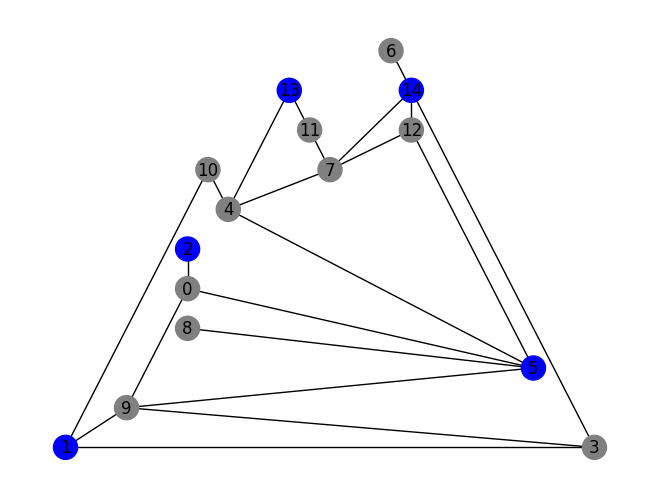

In [32]:
try:
    layout = nx.planar_layout(g_n)
except:
    layout = nx.drawing.spring_layout(g_n)

node_colors = ['blue' if n in s else 'gray' for n in g_n]
nx.draw(g_n, with_labels=True, node_color=node_colors, pos=layout)